In [522]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dython.nominal import associations

# Read file dataset from CSV
data = pd.read_csv("Survei Pengguna Produk Simpanan Individu.csv")

# Data detail
print(data.info())
print(data.describe(include='all'))
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 21 columns):
 #   Column                                                                                                                                                                                                                                                                                                                        Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                                                        --------------  ----- 
 0   Timestamp                                                                                                                                                                                             

In [523]:
data.rename(columns = {
    "Timestamp":"time",
    "Kami mohon kesediaan Anda untuk menjawab pertanyaan-pertanyaan pada section berikutnya dengan jujur dan sesuai dengan produk simpanan individu yang Anda miliki. Dengan lanjut ke section berikutnya, Anda menyetujui bahwa seluruh data (terkecuali nama dan nomor telepon undian) akan digunakan sebagai bahan penelitian.":"auth",
    "Produk simpanan individu apa yang Anda gunakan?":"product",
    "Nama / Inisial":"name",
    "Nomor Telepon - GOPAY/OVO/SHOPEEPAY":"phone_num",
    "Umur":"age",
    "Domisili":"domicile",
    "Gender":"gender",
    "Status Perkawinan":"marriage",
    "Jumlah Tanggungan":"dependent",
    "Kegiatan atau pekerjaan saat ini":"work",
    "Apa tujuan pengunaan produk simpanan individu yang Anda pilih?":"purpose",
    "Berapa jumlah rata-rata penghasilan Anda per bulan?":"net",
    "Seberapa besar rata-rata persentase penghasilan yang Anda tabung?":"savings",
    "Menurut Anda, apakah produk simpanan individu yang Anda gunakan saat ini memiliki fungsionalitas yang baik?":"functionality",
    "Menurut Anda, apakah produk simpanan individu yang Anda gunakan memiliki biaya admin yang sesuai dengan fungsi yang Anda dapatkan?":"admin_fee",
    "Menurut Anda, apakah produk simpanan individu yang anda gunakan memiliki limit tabungan yang sesuai dengan kebutuhan Anda?":"limit",
    "Menurut Anda, apakah produk simpanan individu yang Anda gunakan memiliki bunga tabungan yang sesuai dengan keinginan Anda?":"interest",
    "Menurut Anda, apakah produk simpanan individu yang Anda gunakan saat ini memiliki syarat setoran awal yang memberatkan?":"initial_deposit",
    "Apakah produk simpanan individu yang Anda gunakan sudah sesuai dan cocok dengan kebutuhan, kemampuan, dan keinginan Anda?":"overall",
    "Apakah ada alasan lain di luar bunga, limit, dan biaya admin yang membuat Anda memutuskan untuk menggunakan produk simpanan individu tersebut?":"others"
    }, 
            inplace = True)

print(data)

                    time                             auth             product  \
0       12/11/2024 16:35  Setuju dan saya bersedia lanjut  Tabungan Anak Muda   
1    13/11/2024 07:03:59  Setuju dan saya bersedia lanjut    Tabungan Regular   
2    13/11/2024 07:08:22  Setuju dan saya bersedia lanjut    Tabungan Regular   
3    13/11/2024 07:15:44  Setuju dan saya bersedia lanjut    Tabungan Regular   
4    13/11/2024 07:18:27  Setuju dan saya bersedia lanjut    Tabungan Regular   
..                   ...                              ...                 ...   
439      5/12/2024 10:54  Setuju dan saya bersedia lanjut    Tabungan Regular   
440      6/12/2024 18:11  Setuju dan saya bersedia lanjut  Tabungan Anak Muda   
441      7/12/2024 23:47  Setuju dan saya bersedia lanjut    Tabungan Regular   
442      9/12/2024 18:16  Setuju dan saya bersedia lanjut    Tabungan Regular   
443  15/12/2024 18:43:03  Setuju dan saya bersedia lanjut  Tabungan Anak Muda   

                      name 

Handle Missing Value

time                 0
auth                 0
product              0
name                79
phone_num           89
age                  0
domicile             0
gender               0
marriage             0
dependent            0
work                 0
purpose              0
net                  0
savings              0
functionality        0
admin_fee            0
limit                0
interest             0
initial_deposit      0
overall              0
others             193
dtype: int64

 ---Visualization---


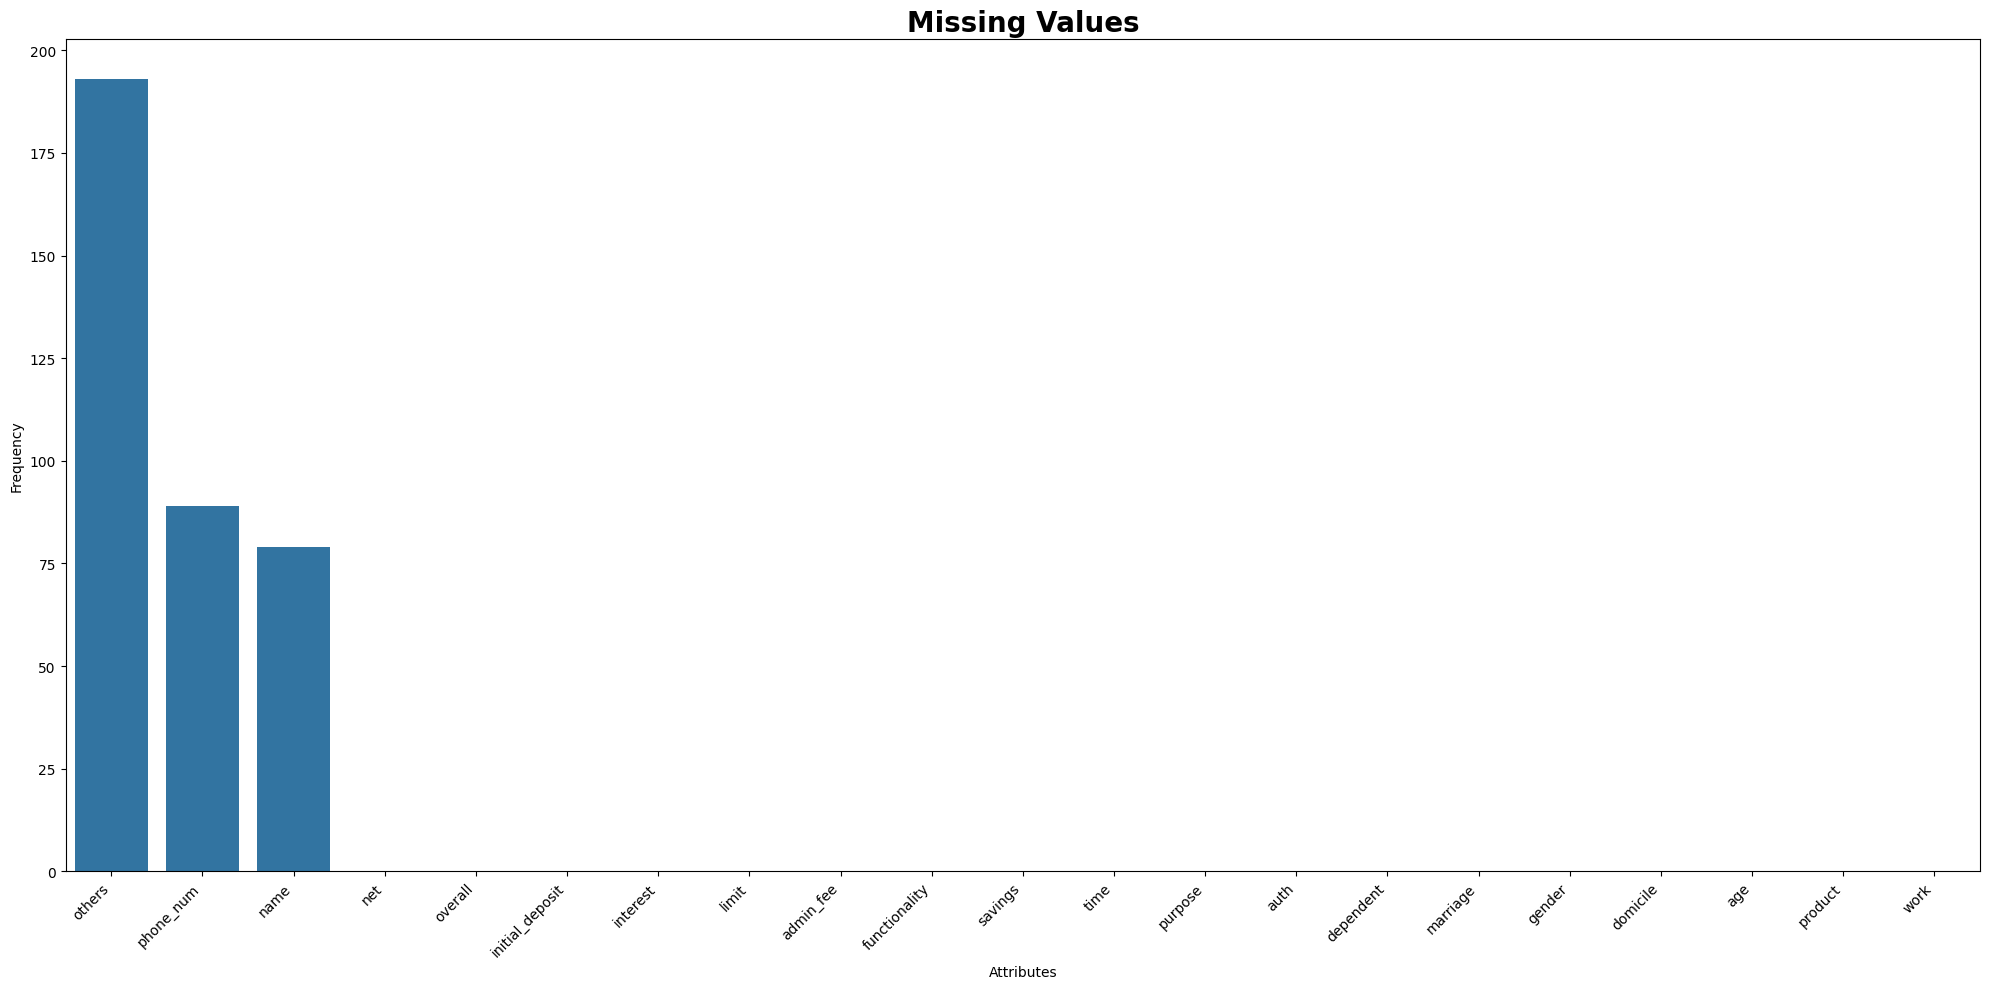

In [524]:
# Cek missing value kolom
print(data.isnull().sum())

print("\n ---Visualization---")

# DataFrame untuk menghitung missing values
missing_values = pd.DataFrame({
    'Attributes': data.columns,  # Nama kolom
    'Frequency': data.isnull().sum()  # Jumlah missing values di setiap kolom
})

# Urutkan berdasarkan jumlah missing value
missing_values = missing_values.sort_values(by='Frequency', ascending=False)

# Plot visualisasi
plt.figure(figsize=(20, 10))  # Ukuran grafik
plt.title('Missing Values', fontsize=20, fontweight='bold')  # Judul grafik

sns.barplot(
    x='Attributes',
    y='Frequency',
    data=missing_values,
    order=missing_values['Attributes']
)

# Rotasi label untuk kolom agar lebih mudah dibaca
plt.xticks(rotation=45, ha='right')

# Tampilkan grafik
plt.tight_layout()  # Atur layout agar tidak terpotong
plt.show()




In [525]:
# Hapus data by label
data.dropna(subset=['product'], inplace=True)

data['others'] = data['others'].fillna("Tidak ada")

# Cek missing value
print(data.isnull().sum())

time                0
auth                0
product             0
name               79
phone_num          89
age                 0
domicile            0
gender              0
marriage            0
dependent           0
work                0
purpose             0
net                 0
savings             0
functionality       0
admin_fee           0
limit               0
interest            0
initial_deposit     0
overall             0
others              0
dtype: int64


Remove Irrelevant Attributes

c:\bel's\college\sekrispi\.venv\lib\site-packages\dython\nominal.py:176: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
c:\bel's\college\sekrispi\.venv\lib\site-packages\dython\nominal.py:176: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
c:\bel's\college\sekrispi\.venv\lib\site-packages\dython\nominal.py:176: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
c:\bel's\college\sekrispi\.venv\lib\site-packages\dython\nominal.py:176: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=F

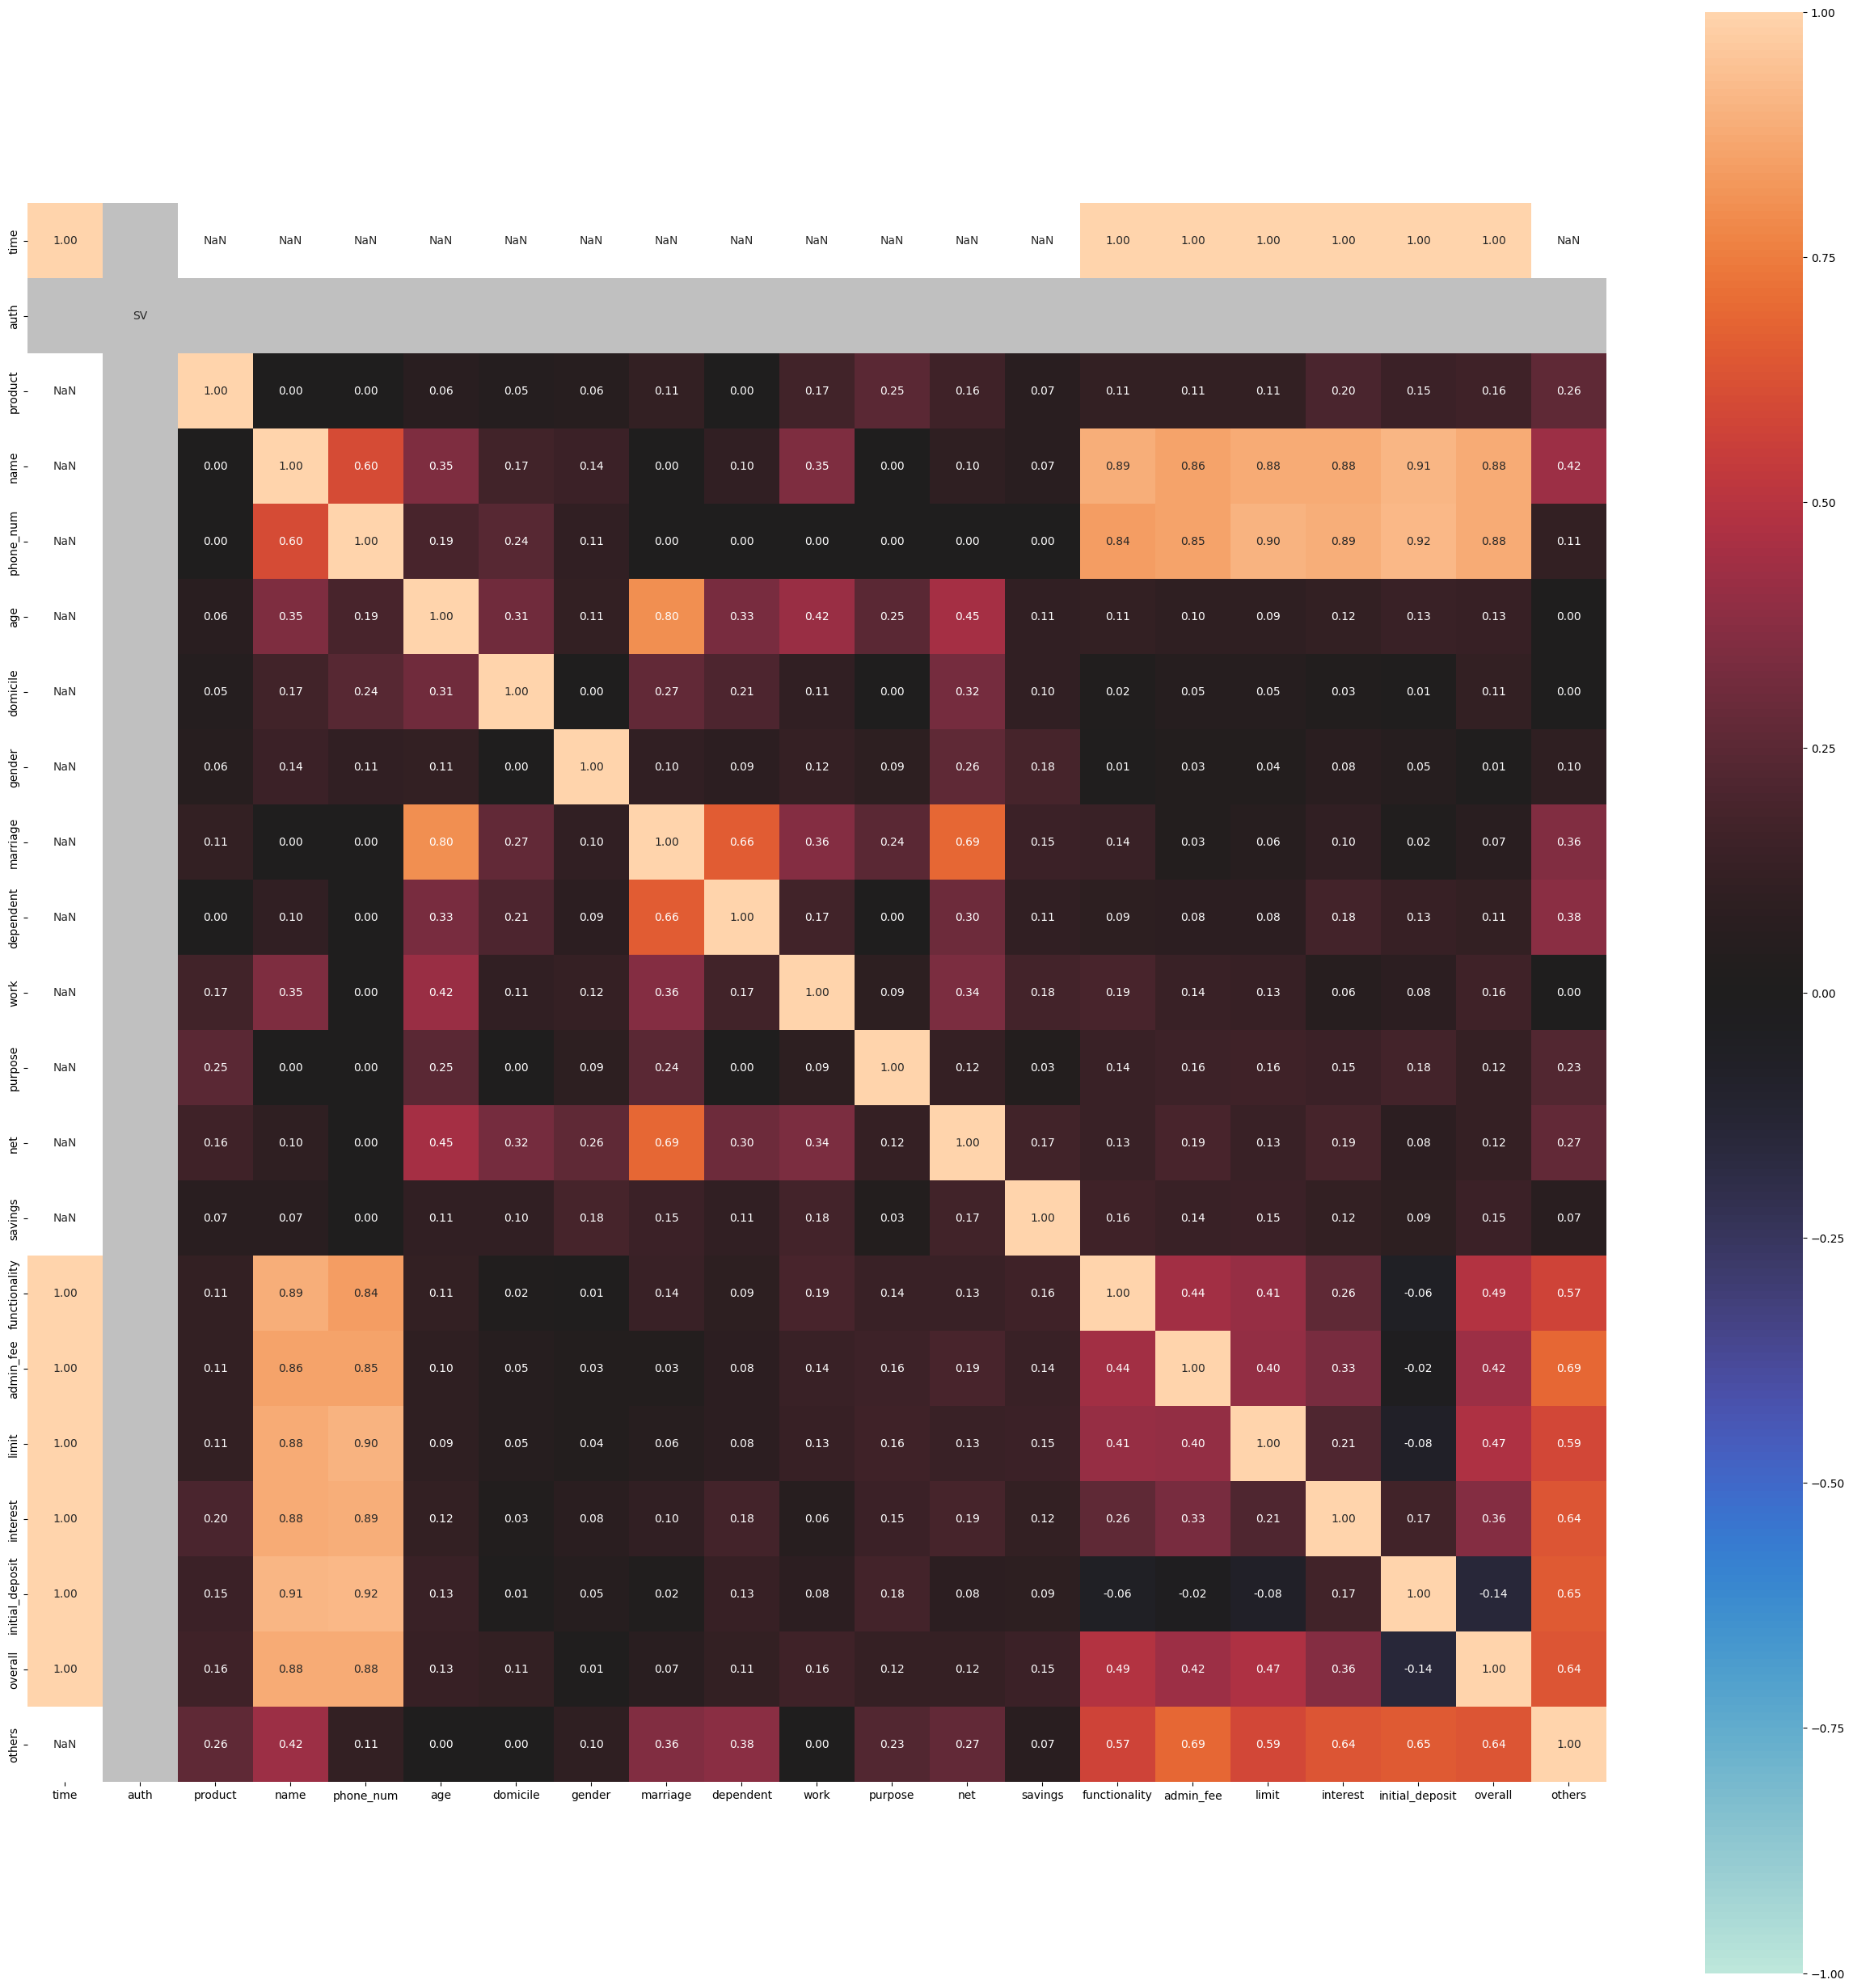

In [526]:
correlations = associations(data)
corr = correlations['corr']

In [527]:
# tampilin nilai corr mat by label
print(corr['product'])

time               0.000000
auth               0.000000
product            1.000000
name               0.000000
phone_num          0.000000
age                0.063552
domicile           0.045980
gender             0.060298
marriage           0.110882
dependent          0.000000
work               0.170219
purpose            0.248651
net                0.158232
savings            0.067812
functionality      0.112885
admin_fee          0.110241
limit              0.111841
interest           0.201152
initial_deposit    0.148419
overall            0.162613
others             0.264085
Name: product, dtype: float64


In [528]:
irrelevant_attributes = corr['product'][corr['product'] < 0.04].keys()
print("Kolom yang akan dihapus:", irrelevant_attributes)

# Hapus kolom dengan korelasi < 0.05
for item in irrelevant_attributes:
    # Hapus kolom dengan nama yang ada di variabel `item`
    data.drop([item], axis=1, inplace=True)

print(data.columns)
data.to_csv("data.csv")

Kolom yang akan dihapus: Index(['time', 'auth', 'name', 'phone_num', 'dependent'], dtype='object')
Index(['product', 'age', 'domicile', 'gender', 'marriage', 'work', 'purpose',
       'net', 'savings', 'functionality', 'admin_fee', 'limit', 'interest',
       'initial_deposit', 'overall', 'others'],
      dtype='object')


In [529]:
from sklearn import preprocessing

#one-hot encoding purpose
all_purpose = {'Investasi', 'Simpanan jangka panjang', 'Kegiatan sehari-hari', 'Lainnya'}
for purpose in all_purpose:
    data[purpose] = data['purpose'].apply(lambda x:1 if purpose in x else 0)
 
#rename column purpose    
data.rename(columns = {
    "Investasi":"invest",
    "Simpanan jangka panjang":"long_trm_svg",
    "Kegiatan sehari-hari":"daily_life",
    "Lainnya":"other_purpose"
    }, 
            inplace = True)
data = data.drop('purpose',axis=1)

# label_encoder = preprocessing.LabelEncoder() 
# data['product'] = label_encoder.fit_transform(data['product'])
# data['age'] = label_encoder.fit_transform(data['age'])
# data['gender'] = label_encoder.fit_transform(data['gender'])
# data['marriage'] = label_encoder.fit_transform(data['marriage'])
# data['work'] = label_encoder.fit_transform(data['work'])
# data['net'] = label_encoder.fit_transform(data['net'])
# data['savings'] = label_encoder.fit_transform(data['savings'])
# data['functionality'] = label_encoder.fit_transform(data['functionality'])
# data['admin_fee'] = label_encoder.fit_transform(data['admin_fee'])
# data['limit'] = label_encoder.fit_transform(data['limit'])
# data['interest'] = label_encoder.fit_transform(data['interest'])
# data['initial_deposit'] = label_encoder.fit_transform(data['initial_deposit'])
# data['overall'] = label_encoder.fit_transform(data['overall'])

In [530]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import resample

In [531]:
# #Temp Penghitungan Data
# class_data = []

# # Menampilkan jumlah record per kelas sebelum oversampling
# print("Jumlah record per kelas sebelum resampling:")
# print(data['product'].value_counts())

# # Membuat list untuk menampung DataFrame hasil upsampling
# resampled_dfs = []

# # Melakukan upsampling hanya pada kelas yang memiliki jumlah kurang dari 50
# for class_label in data['product'].unique():
#     class_data = data[data['product'] == class_label]
    
#     # Cek jika jumlah data pada kelas kurang dari 50
#     if len(class_data) < 50:
#         # resampled_dfs.append(class_data)
#         class_data_upsampled = resample(class_data,
#                                         replace=True,  # Sampling dengan penggantian
#                                         n_samples=100,  # Mengambil sampel sampai mencapai 50
#                                         random_state=42)  # Untuk hasil yang konsisten
#         resampled_dfs.append(class_data_upsampled)
#     else:
#         # resampled_dfs.append(class_data)
#         if len(class_data) > 100:
#             # resampled_dfs.append(class_data)
#             class_data_downsampled = resample(class_data,
#                                         replace=True,  # Sampling dengan penggantian
#                                         n_samples=100,  # Mengambil sampel sampai mencapai 50
#                                         random_state=42)  # Untuk hasil yang konsisten
#             resampled_dfs.append(class_data_downsampled)
#         # Jika jumlah data sudah cukup (>= 50), masukkan data aslinya
#         # else:
#         #     resampled_dfs.append(class_data)

# # Gabungkan kembali semua kelas yang sudah diupsample
# data = pd.concat(resampled_dfs)

# # Menampilkan jumlah record per kelas setelah oversampling
# print("\nJumlah record per kelas setelah resampling:")
# print(data['product'].value_counts())

# # Menampilkan DataFrame yang sudah diupsample
# print("\nDataFrame setelah resampling:")
# print(data)

In [532]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC

y = data['product']
X = data.drop(['product'],axis=1)
X = data.drop(['others'],axis=1)

categorical_features=list(X.columns)
print(categorical_features)

# ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
# X, y = ros.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# smote = SMOTENC(categorical_features=categorical_features, random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)

['product', 'age', 'domicile', 'gender', 'marriage', 'work', 'net', 'savings', 'functionality', 'admin_fee', 'limit', 'interest', 'initial_deposit', 'overall', 'daily_life', 'other_purpose', 'invest', 'long_trm_svg']


In [533]:

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations=500, 
                           learning_rate=0.1, 
                           depth=6, 
                           cat_features=categorical_features, 
                           verbose=50,
                           auto_class_weights='SqrtBalanced')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy_train = accuracy_score(y_train, model.predict(X_train)) * 100
print(f"Model Accuracy Train: " + str(accuracy_train))

precision_train = precision_score(y_train, model.predict(X_train), average='weighted') * 100
print(f"Model Precision Train: " + str(precision_train))

recall_train = recall_score(y_train, model.predict(X_train), average='weighted') * 100
print(f"Model Recall Train: " + str(recall_train))

f1_train = f1_score(y_train, model.predict(X_train), average='weighted') * 100
print(f"Model F1 Train: " + str(f1_train))


accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Model Accuracy Test: " + str(accuracy))

precision = precision_score(y_test, y_pred, average='weighted') * 100
print(f"Model Precision Test: " + str(precision))

recall = recall_score(y_test, y_pred, average='weighted') * 100
print(f"Model Recall Test: " + str(recall))

f1 = f1_score(y_test, y_pred, average='weighted') * 100
print(f"Model F1 Score Test: " + str(f1))


0:	learn: 1.8336534	total: 350ms	remaining: 2m 54s
50:	learn: 0.2820021	total: 10.3s	remaining: 1m 30s


In [477]:
# # Compute confusion matrix
# cm = confusion_matrix(y_test, y_pred)

# # Print confusion matrix
# print("Confusion Matrix:\n", cm)

# num_classes = cm.shape[0]  # Get number of classes
# conf_matrix_data = []

# # Compute TP, TN, FP, FN for each class
# for i in range(num_classes):
#     TP = cm[i, i]  # True Positive
#     FP = cm[:, i].sum() - TP  # False Positive (sum of the column minus TP)
#     FN = cm[i, :].sum() - TP  # False Negative (sum of the row minus TP)
#     TN = cm.sum() - (TP + FP + FN)  # True Negative (total sum minus TP, FP, FN)
    
#     conf_matrix_data.append([TP, FP, TN, FN])

# # Convert the confusion matrix data into a DataFrame for easy display
# conf_matrix_df = pd.DataFrame(conf_matrix_data, columns=['True Positive (TP)', 'False Positive (FP)', 'True Negative (TN)', 'False Negative (FN)'])

# # Display the confusion matrix table
# print("\nConfusion Matrix Table (TP, FP, TN, FN):")
# print(conf_matrix_df)